# Spark SQL API 
## Financial data

In [35]:
from pyspark import SparkConf
from pyspark import SparkContext

In [36]:
import os
PATH_TO_FILES = '/home/dmitry/pyspark-training/files'
MASTER_URL = 'spark://185739.simplecloud.ru:7077'

In [37]:
conf = SparkConf()
conf = conf.set('spark.driver.memory', '512m')
conf = conf.set('spark.executor.memory', '512m')
conf = conf.set('spark.executor.cores', '2')

In [38]:
sc = SparkContext(MASTER_URL, appName="SQL API. Financial", conf=conf)

In [39]:
from pyspark.sql import SparkSession

In [40]:
sql = SparkSession(sc)

In [41]:
sql

In [42]:
!ls /home/dmitry/pyspark-training/files/financial/original

account.csv  client.csv    disp.csv	 loan.csv   trans.csv
card.csv     data map.gif  district.csv  order.csv


In [43]:
for tbl in ['account', 'client', 'disp', 'loan', 'trans', 'card', 'district',  'order']:
    fname = tbl
    data = sql.read.csv(os.path.join(PATH_TO_FILES, 'financial', 'original', '{}.csv'.format(fname)), header=True, sep=';')
    data.registerTempTable(fname)

In [44]:
sql.sql('select * from account').show()

+----------+-----------+------------------+------+
|account_id|district_id|         frequency|  date|
+----------+-----------+------------------+------+
|       576|         55|  POPLATEK MESICNE|930101|
|      3818|         74|  POPLATEK MESICNE|930101|
|       704|         55|  POPLATEK MESICNE|930101|
|      2378|         16|  POPLATEK MESICNE|930101|
|      2632|         24|  POPLATEK MESICNE|930102|
|      1972|         77|  POPLATEK MESICNE|930102|
|      1539|          1|POPLATEK PO OBRATU|930103|
|       793|         47|  POPLATEK MESICNE|930103|
|      2484|         74|  POPLATEK MESICNE|930103|
|      1695|         76|  POPLATEK MESICNE|930103|
|      1726|         48|  POPLATEK MESICNE|930103|
|      2881|         70|  POPLATEK MESICNE|930104|
|      2357|         19|  POPLATEK MESICNE|930104|
|      2177|         62|  POPLATEK MESICNE|930104|
|       485|          6|POPLATEK PO OBRATU|930104|
|       652|         21|  POPLATEK MESICNE|930105|
|      9635|         70|  POPLA

In [45]:
sql.sql('select * from client').show()

+---------+------------+-----------+
|client_id|birth_number|district_id|
+---------+------------+-----------+
|        1|      706213|         18|
|        2|      450204|          1|
|        3|      406009|          1|
|        4|      561201|          5|
|        5|      605703|          5|
|        6|      190922|         12|
|        7|      290125|         15|
|        8|      385221|         51|
|        9|      351016|         60|
|       10|      430501|         57|
|       11|      505822|         57|
|       12|      810220|         40|
|       13|      745529|         54|
|       14|      425622|         76|
|       15|      185828|         21|
|       16|      190225|         21|
|       17|      341013|         76|
|       18|      315405|         76|
|       19|      421228|         47|
|       20|      790104|         46|
+---------+------------+-----------+
only showing top 20 rows



In [46]:
sql.sql('select * from disp').show()

+-------+---------+----------+---------+
|disp_id|client_id|account_id|     type|
+-------+---------+----------+---------+
|      1|        1|         1|    OWNER|
|      2|        2|         2|    OWNER|
|      3|        3|         2|DISPONENT|
|      4|        4|         3|    OWNER|
|      5|        5|         3|DISPONENT|
|      6|        6|         4|    OWNER|
|      7|        7|         5|    OWNER|
|      8|        8|         6|    OWNER|
|      9|        9|         7|    OWNER|
|     10|       10|         8|    OWNER|
|     11|       11|         8|DISPONENT|
|     12|       12|         9|    OWNER|
|     13|       13|        10|    OWNER|
|     14|       14|        11|    OWNER|
|     15|       15|        12|    OWNER|
|     16|       16|        12|DISPONENT|
|     17|       17|        13|    OWNER|
|     18|       18|        13|DISPONENT|
|     19|       19|        14|    OWNER|
|     20|       20|        15|    OWNER|
+-------+---------+----------+---------+
only showing top

In [47]:
sql.sql('select * from loan').show()

+-------+----------+------+------+--------+--------+------+
|loan_id|account_id|  date|amount|duration|payments|status|
+-------+----------+------+------+--------+--------+------+
|   5314|      1787|930705| 96396|      12| 8033.00|     B|
|   5316|      1801|930711|165960|      36| 4610.00|     A|
|   6863|      9188|930728|127080|      60| 2118.00|     A|
|   5325|      1843|930803|105804|      36| 2939.00|     A|
|   7240|     11013|930906|274740|      60| 4579.00|     A|
|   6687|      8261|930913| 87840|      24| 3660.00|     A|
|   7284|     11265|930915| 52788|      12| 4399.00|     A|
|   6111|      5428|930924|174744|      24| 7281.00|     B|
|   7235|     10973|931013|154416|      48| 3217.00|     A|
|   5997|      4894|931104|117024|      24| 4876.00|     A|
|   7121|     10364|931110| 21924|      36|  609.00|     A|
|   6077|      5270|931122| 79608|      24| 3317.00|     A|
|   6228|      6034|931201|464520|      60| 7742.00|     B|
|   6356|      6701|931208| 95400|      

In [48]:
sql.sql('select * from trans').show()

+--------+----------+------+------+-------------+-------+-------+--------+----+--------+
|trans_id|account_id|  date|  type|    operation| amount|balance|k_symbol|bank| account|
+--------+----------+------+------+-------------+-------+-------+--------+----+--------+
|  695247|      2378|930101|PRIJEM|        VKLAD| 700.00| 700.00|    null|null|    null|
|  171812|       576|930101|PRIJEM|        VKLAD| 900.00| 900.00|    null|null|    null|
|  207264|       704|930101|PRIJEM|        VKLAD|1000.00|1000.00|    null|null|    null|
| 1117247|      3818|930101|PRIJEM|        VKLAD| 600.00| 600.00|    null|null|    null|
|  579373|      1972|930102|PRIJEM|        VKLAD| 400.00| 400.00|    null|null|    null|
|  771035|      2632|930102|PRIJEM|        VKLAD|1100.00|1100.00|    null|null|    null|
|  452728|      1539|930103|PRIJEM|        VKLAD| 600.00| 600.00|    null|null|    null|
|  725751|      2484|930103|PRIJEM|        VKLAD|1100.00|1100.00|    null|null|    null|
|  497211|      1695|

In [49]:
sql.sql('select * from card').show()

+-------+-------+-------+---------------+
|card_id|disp_id|   type|         issued|
+-------+-------+-------+---------------+
|   1005|   9285|classic|931107 00:00:00|
|    104|    588|classic|940119 00:00:00|
|    747|   4915|classic|940205 00:00:00|
|     70|    439|classic|940208 00:00:00|
|    577|   3687|classic|940215 00:00:00|
|    377|   2429|classic|940303 00:00:00|
|    721|   4680| junior|940405 00:00:00|
|    437|   2762|classic|940601 00:00:00|
|    188|   1146|classic|940619 00:00:00|
|     13|     87|classic|940629 00:00:00|
|    732|   4763|classic|940721 00:00:00|
|    181|   1066|classic|940819 00:00:00|
|    384|   2475| junior|940915 00:00:00|
|    309|   1946|classic|940919 00:00:00|
|    478|   3084|classic|941009 00:00:00|
|    563|   3589|classic|941021 00:00:00|
|    369|   2363|classic|941108 00:00:00|
|    376|   2428|classic|941110 00:00:00|
|    483|   3115|classic|941124 00:00:00|
|    174|   1039| junior|941204 00:00:00|
+-------+-------+-------+---------

In [50]:
sql.sql('select * from district').show()

+---+-----------------+---------------+-------+---+---+---+---+---+-----+-----+----+----+---+-----+-----+
| A1|               A2|             A3|     A4| A5| A6| A7| A8| A9|  A10|  A11| A12| A13|A14|  A15|  A16|
+---+-----------------+---------------+-------+---+---+---+---+---+-----+-----+----+----+---+-----+-----+
|  1|      Hl.m. Praha|         Prague|1204953|  0|  0|  0|  1|  1|100.0|12541|0.29|0.43|167|85677|99107|
|  2|          Benesov|central Bohemia|  88884| 80| 26|  6|  2|  5| 46.7| 8507|1.67|1.85|132| 2159| 2674|
|  3|           Beroun|central Bohemia|  75232| 55| 26|  4|  1|  5| 41.7| 8980|1.95|2.21|111| 2824| 2813|
|  4|           Kladno|central Bohemia| 149893| 63| 29|  6|  2|  6| 67.4| 9753|4.64|5.05|109| 5244| 5892|
|  5|            Kolin|central Bohemia|  95616| 65| 30|  4|  1|  6| 51.4| 9307|3.85|4.43|118| 2616| 3040|
|  6|       Kutna Hora|central Bohemia|  77963| 60| 23|  4|  2|  4| 51.5| 8546|2.95|4.02|126| 2640| 3120|
|  7|           Melnik|central Bohemia|  94725

In [51]:
sql.sql('select * from order').show()

+--------+----------+-------+----------+-------+--------+
|order_id|account_id|bank_to|account_to| amount|k_symbol|
+--------+----------+-------+----------+-------+--------+
|   29401|         1|     YZ|  87144583|2452.00|    SIPO|
|   29402|         2|     ST|  89597016|3372.70|    UVER|
|   29403|         2|     QR|  13943797|7266.00|    SIPO|
|   29404|         3|     WX|  83084338|1135.00|    SIPO|
|   29405|         3|     CD|  24485939| 327.00|        |
|   29406|         3|     AB|  59972357|3539.00|POJISTNE|
|   29407|         4|     UV|  26693541|2078.00|    SIPO|
|   29408|         4|     UV|   5848086|1285.00|    SIPO|
|   29409|         5|     GH|  37390208|2668.00|    SIPO|
|   29410|         6|     AB|  44486999|3954.00|    SIPO|
|   29411|         7|     IJ|  34452903|4880.00|    SIPO|
|   29412|         8|     UV|  12510681|2612.00|    SIPO|
|   29413|         8|     IJ|  93210345|6712.00|        |
|   29414|        10|     UV|  18686104|7033.00|    SIPO|
|   29415|    

* array_distinct удаляет дубликаты из массива, т.е [1,2,3,4,4,5,null] -> [1,2,3,4,5,null]
* array_intersect пересечение среди двух списков, т.е [1,2,3];[1,3,5] -> [1,3]
* array_union объединение двух списков без повторения
* array_sort сортировка
* concat конкатенация
* flatten несколько вложенных списков в один
* https://docs.databricks.com/_static/notebooks/apache-spark-2.4-functions.html

In [55]:
sql.sql("""
    select 
        * 
    from 
        trans""").describe().show()

+-------+------------------+------------------+------------------+-------+--------------+------------------+------------------+--------+------+--------------------+
|summary|          trans_id|        account_id|              date|   type|     operation|            amount|           balance|k_symbol|  bank|             account|
+-------+------------------+------------------+------------------+-------+--------------+------------------+------------------+--------+------+--------------------+
|  count|           1056320|           1056320|           1056320|1056320|        873206|           1056320|           1056320|  574439|273508|              295389|
|   mean|1335310.7043301272|2936.8672902150865| 965674.8198926462|   null|          null|5924.1456758289905| 38518.33080316705|    null|  null|4.5670919374915786E7|
| stddev|1227486.5083824093| 2477.345127182351|13945.346734685074|   null|          null| 9522.735373120275|22117.868012591705|    null|  null|3.0663396851202257E7|
|    min| 

In [62]:
sql.sql(
"""
    SELECT
        client_id, collect_list(card_id)
    FROM
        (SELECT
            disp_id, client_id
        FROM
            disp) as t1
        INNER JOIN
        (SELECT
            disp_id, card_id
        FROM
            card) as t2
        ON t1.disp_id = t2.disp_id
    GROUP BY client_id
    ORDER BY client_id
""").show()

+---------+---------------------+
|client_id|collect_list(card_id)|
+---------+---------------------+
|    10040|               [1035]|
|    10043|               [1036]|
|    10095|               [1038]|
|     1011|                [167]|
|    10145|               [1039]|
|     1018|                [168]|
|     1019|                [169]|
|    10198|               [1040]|
|     1020|                [170]|
|     1027|                [171]|
|    10282|               [1043]|
|     1030|                [172]|
|     1031|                [173]|
|     1039|                [174]|
|     1040|                [175]|
|    10479|               [1055]|
|     1049|                [176]|
|    10528|               [1056]|
|    10543|               [1059]|
|     1056|                [177]|
+---------+---------------------+
only showing top 20 rows



In [70]:
collected = sql.sql("""
    SELECT 
        account_id,
        collect_list(amount) as ts
    FROM 
        trans
    GROUP BY account_id
""")

In [71]:
collected.registerTempTable('transaction_list')

In [72]:
sql.sql("select * from transaction_list").show()

+----------+--------------------+
|account_id|                  ts|
+----------+--------------------+
|     10351|[800.00, 4410.00,...|
|     10436|[3700.00, 800.00,...|
|      1090|[1000.00, 6318.00...|
|      1159|[6470.00, 400.00,...|
|      1436|[500.00, 3100.00,...|
|      1512|[9200.00, 900.00,...|
|      2088|[4200.00, 400.00,...|
|      2294|[900.00, 13831.00...|
|      2904|[15946.00, 800.00...|
|       296|[2646.00, 300.00,...|
|      3210|[24439.00, 1000.0...|
|      3606|[900.00, 6100.00,...|
|      3959|[300.00, 16806.00...|
|       467|[500.00, 14.60, 1...|
|      4937|[5996.20, 700.00,...|
|       675|[900.00, 9538.00,...|
|       691|[1100.00, 5013.00...|
|       829|[800.00, 3181.00,...|
|      9030|[2587.00, 200.00,...|
|      9583|[300.00, 200.20, ...|
+----------+--------------------+
only showing top 20 rows



In [77]:
# вариант 1
sql.sql("""

    SELECT
        account_id, collect_list(t) as ts_unique
    FROM
        (SELECT
            account_id, t, COUNT(t)
        FROM
            (SELECT 
                account_id, explode(ts) as t
            FROM
                transaction_list) as t1
        GROUP BY account_id, t) as inn
    GROUP BY account_id
        
""").show()

+----------+--------------------+
|account_id|           ts_unique|
+----------+--------------------+
|     10351|[800.00, 4410.00,...|
|     10436|[3700.00, 800.00,...|
|      1090|[1000.00, 6318.00...|
|      1159|[6470.00, 400.00,...|
|      1436|[500.00, 3100.00,...|
|      1512|[9200.00, 900.00,...|
|      2088|[4200.00, 400.00,...|
|      2294|[900.00, 13831.00...|
|      2904|[15946.00, 800.00...|
|       296|[2646.00, 300.00,...|
|      3210|[24439.00, 1000.0...|
|      3606|[900.00, 6100.00,...|
|      3959|[300.00, 16806.00...|
|       467|[500.00, 14.60, 1...|
|      4937|[5996.20, 700.00,...|
|       675|[900.00, 9538.00,...|
|       691|[1100.00, 5013.00...|
|       829|[800.00, 3181.00,...|
|      9030|[2587.00, 200.00,...|
|      9583|[300.00, 200.20, ...|
+----------+--------------------+
only showing top 20 rows



In [81]:
sql.sql("select * from transaction_list").show()

+----------+--------------------+
|account_id|                  ts|
+----------+--------------------+
|     10351|[800.00, 4410.00,...|
|     10436|[3700.00, 800.00,...|
|      1090|[1000.00, 6318.00...|
|      1159|[6470.00, 400.00,...|
|      1436|[500.00, 3100.00,...|
|      1512|[9200.00, 900.00,...|
|      2088|[4200.00, 400.00,...|
|      2294|[900.00, 13831.00...|
|      2904|[15946.00, 800.00...|
|       296|[2646.00, 300.00,...|
|      3210|[24439.00, 1000.0...|
|      3606|[900.00, 6100.00,...|
|      3959|[300.00, 16806.00...|
|       467|[500.00, 14.60, 1...|
|      4937|[5996.20, 700.00,...|
|       675|[900.00, 9538.00,...|
|       691|[1100.00, 5013.00...|
|       829|[800.00, 3181.00,...|
|      9030|[2587.00, 200.00,...|
|      9583|[300.00, 200.20, ...|
+----------+--------------------+
only showing top 20 rows



In [83]:
sql.sql("""
    SELECT
        account_id, array_distinct(ts) as ts_unique
    FROM    
        transaction_list
""").show()

+----------+--------------------+
|account_id|           ts_unique|
+----------+--------------------+
|     10351|[800.00, 4410.00,...|
|     10436|[3700.00, 800.00,...|
|      1090|[1000.00, 6318.00...|
|      1159|[6470.00, 400.00,...|
|      1436|[500.00, 3100.00,...|
|      1512|[9200.00, 900.00,...|
|      2088|[4200.00, 400.00,...|
|      2294|[900.00, 13831.00...|
|      2904|[15946.00, 800.00...|
|       296|[2646.00, 300.00,...|
|      3210|[24439.00, 1000.0...|
|      3606|[900.00, 6100.00,...|
|      3959|[300.00, 16806.00...|
|       467|[500.00, 14.60, 1...|
|      4937|[5996.20, 700.00,...|
|       675|[900.00, 9538.00,...|
|       691|[1100.00, 5013.00...|
|       829|[800.00, 3181.00,...|
|      9030|[2587.00, 200.00,...|
|      9583|[300.00, 200.20, ...|
+----------+--------------------+
only showing top 20 rows



In [84]:
((512-300)*0.75) / 2

79.5

In [85]:
collected.rdd.getNumPartitions()

200

In [180]:
data = sql.read.csv(os.path.join(PATH_TO_FILES, 'financial', 'original', 'trans.csv'.format(fname)), header=True, sep=';')

In [92]:
from pyspark.sql import functions as F

In [94]:
data.select('account_id').agg(F.countDistinct('account_id')).show()

+--------------------------+
|count(DISTINCT account_id)|
+--------------------------+
|                      4500|
+--------------------------+



In [95]:
data.select('account_id').describe().show()

+-------+------------------+
|summary|        account_id|
+-------+------------------+
|  count|           1056320|
|   mean|2936.8672902150865|
| stddev| 2477.345127182351|
|    min|                 1|
|    max|               998|
+-------+------------------+



In [97]:
pd_data = data.groupby('account_id').count().toPandas()

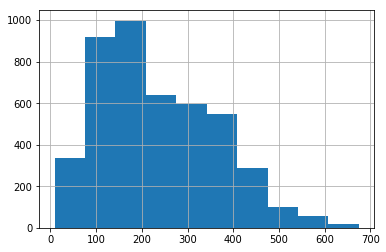

In [104]:
from matplotlib import pyplot as plt
pd_data['count'].hist()

### Не делаем никаких изменений с входными партициями

In [231]:
conf = SparkConf()
conf = conf.set('spark.driver.memory', '512m')
conf = conf.set('spark.executor.memory', '1g')
conf = conf.set('spark.executor.cores', '2')

In [232]:
sc = SparkContext(MASTER_URL, appName="SQL API. Financial", conf=conf)

In [234]:
sql = SparkSession(sc)

In [238]:
data = sql.read.csv(os.path.join(PATH_TO_FILES, 'financial', 'original', 'trans.csv'.format(fname)), header=True, sep=';')
data.registerTempTable('trans_default')

In [239]:
collected = sql.sql("""
    SELECT 
        account_id,
        collect_list(amount) as ts
    FROM 
        trans_default
    GROUP BY account_id
""")

In [240]:
collected.select('account_id', F.array_distinct('ts').alias('ts_unique')).show()

+----------+--------------------+
|account_id|           ts_unique|
+----------+--------------------+
|     10351|[800.00, 6616.00,...|
|     10436|[800.00, 7496.00,...|
|      1090|[1000.00, 6318.00...|
|      1159|[400.00, 10874.00...|
|      1436|[500.00, 6986.00,...|
|      1512|[900.00, 3500.00,...|
|      2088|[400.00, 4861.00,...|
|      2294|[900.00, 13831.00...|
|      2904|[800.00, 15946.00...|
|       296|[300.00, 3970.00,...|
|      3210|[1000.00, 36658.0...|
|      3606|[900.00, 6784.00,...|
|      3959|[300.00, 16806.00...|
|       467|[500.00, 10249.00...|
|      4937|[700.00, 44455.00...|
|       675|[900.00, 9538.00,...|
|       691|[1100.00, 5013.00...|
|       829|[800.00, 3181.00,...|
|      9030|[200.00, 17592.00...|
|      9583|[300.00, 14600.00...|
+----------+--------------------+
only showing top 20 rows



### просто сделаем партиционирование на 10 равных частей

In [193]:
data = sql.read.csv(os.path.join(PATH_TO_FILES, 'financial', 'original', 'trans.csv'.format(fname)), header=True, sep=';')

In [194]:
data = data.repartition(10)

In [195]:
data.rdd.getNumPartitions()

10

In [196]:
data.registerTempTable('trans_10_parts')

In [197]:
collected = sql.sql("""
    SELECT 
        account_id,
        collect_list(amount) as ts
    FROM 
        trans_10_parts
    GROUP BY account_id
""")

In [114]:
collected.rdd.getNumPartitions()

200

In [198]:
collected.select('account_id', F.array_distinct('ts').alias('ts_unique')).show()

+----------+--------------------+
|account_id|           ts_unique|
+----------+--------------------+
|     10351|[14.60, 6616.00, ...|
|     10436|[153.90, 143.70, ...|
|      1090|[29.30, 119.10, 9...|
|      1159|[3000.00, 3360.00...|
|      1436|[400.00, 3800.00,...|
|      1512|[3100.00, 131.90,...|
|      1572|[5600.00, 14.60, ...|
|      2069|[14.60, 484.00, 2...|
|      2088|[101.60, 4861.00,...|
|      2136|[1000.00, 9816.00...|
|      2162|[48099.00, 2500.0...|
|      2294|[14.60, 900.00, 1...|
|      2904|[15946.00, 6200.0...|
|       296|[75.60, 3970.00, ...|
|      3210|[3600.00, 24439.0...|
|      3606|[112.10, 119.00, ...|
|      3959|[10100.00, 180.60...|
|       467|[84.00, 14.60, 94...|
|      4937|[5996.20, 293.10,...|
|       675|[2400.00, 155.50,...|
+----------+--------------------+
only showing top 20 rows



### Предположение. У старых аккаунтов транзакций больше.
#### Мы отправим половину массы распределения на один исполнитель, а другую половину на другой

In [123]:
account = sql.sql('select account_id, date from account')
pd_data_with_date = data.groupby('account_id').count().join(account, on=['account_id']).toPandas()

In [128]:
import pandas as pd
pd_data_with_date['date'] = pd.to_datetime(pd_data_with_date['date'])

In [131]:
pd_data_with_date = pd_data_with_date.rename({'count': 'ts_number'}, axis=1)

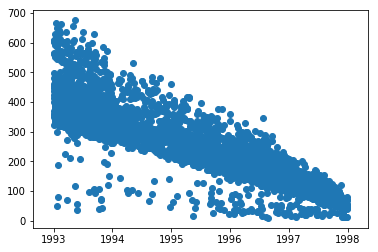

In [145]:
from matplotlib import pyplot as plt
vals = pd_data_with_date.sort_values(by=['date','ts_number'])[['date', 'ts_number']]

plt.scatter(vals['date'], vals['ts_number'])

In [155]:
def get_year(r):
    return r.year
pd_data_with_date['year'] = pd_data_with_date['date'].apply(get_year)

In [166]:
summed = pd_data_with_date.groupby('year').sum()
summary = summed['ts_number'].sum()
summed['ratio'] = summed / summary
summed

,ts_number,ratio
year,,
1993,445457,0.421706
1994,139388,0.131956
1995,159170,0.150684
1996,228420,0.216241
1997,83885,0.079412


In [221]:
data = sql.read.csv(os.path.join(PATH_TO_FILES, 'financial', 'original', 'trans.csv'.format(fname)), header=True, sep=';')

In [222]:
def my_partitioner(year_value):
    if year_value < 1995:
        return 0
    else:
        return 1
    
from pyspark.sql.functions import unix_timestamp, from_unixtime
    
data = data.select('account_id', 'amount').join(account, on=['account_id']).select('account_id', 'amount', F.substring(F.col('date'), 0, 2).alias('date'))
data = data.select('*', F.when(F.col('date') == '93', 1000).when(F.col('date') == '94', 1000).otherwise(1000000).alias('partitioner'))
#data.filter(F.col('partitioner') == 1).show()

In [223]:
data = data.repartition(2, F.col('partitioner'))

In [224]:
data.rdd.getNumPartitions()

2

In [225]:
data.registerTempTable('trans_custom_partitioner_3')

In [226]:
collected = sql.sql("""
    SELECT 
        account_id,
        collect_list(amount) as ts
    FROM 
        trans_custom_partitioner_3
    GROUP BY account_id
""")

In [227]:
collected.rdd.getNumPartitions()

200

In [228]:
collected.select('account_id', F.array_distinct('ts').alias('ts_unique')).show()

+----------+--------------------+
|account_id|           ts_unique|
+----------+--------------------+
|     10351|[14.60, 800.00, 9...|
|     10436|[14.60, 800.00, 2...|
|      1090|[14.60, 1000.00, ...|
|      1572|[14.60, 500.00, 7...|
|      2069|[219.20, 900.00, ...|
|      2136|[115.70, 600.00, ...|
|      2162|[14.60, 26891.00,...|
|      2294|[14.60, 900.00, 1...|
|      2904|[271.80, 800.00, ...|
|       296|[60.90, 300.00, 1...|
|      3606|[277.30, 900.00, ...|
|      3959|[300.00, 30.00, 1...|
|       675|[243.90, 900.00, ...|
|       691|[79.10, 1100.00, ...|
|       829|[107.20, 800.00, ...|
|      9030|[197.60, 6600.00,...|
|      1159|[3100.00, 400.00,...|
|      1436|[2900.00, 500.00,...|
|      1512|[9900.00, 900.00,...|
|      2088|[74.10, 400.00, 1...|
+----------+--------------------+
only showing top 20 rows



In [241]:
sql.stop()

In [242]:
sc.stop()